<a href="https://colab.research.google.com/github/MaidenTaief/Music_Final/blob/main/Taief123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The initial phase in developing our music recommendation system involves preparing and inspecting our dataset to ensure its suitability for further analysis. We employ the pandas library for its powerful data manipulation capabilities. The dataset, stored in a CSV file (data.csv), encapsulates various musical attributes spanning multiple years. These attributes include but are not limited to valence, acousticness, danceability, duration, energy, and popularity, alongside metadata such as the year of release, artist names, and track identifiers.

### Initial Observations from the Dataset

The initial exploration of the dataset reveals the following structure, showcasing a subset of the attributes available for each track:

- **Valence:** A measure of musical positiveness.
- **Year:** The year of the track's release.
- **Artists:** The artists involved in the creation of the track.
- **Danceability:** How suitable a track is for dancing.
- **Duration_ms:** The duration of the track in milliseconds.
- **Energy:** A perceptual measure of intensity and activity.
- **Explicit:** Whether the track contains explicit content.
- **ID:** A unique identifier for the track.
- **Instrumentalness:** The likelihood of the track being instrumental.
- **Key:** The key the track is in.
- **Liveness:** The presence of an audience in the recording.
- **Loudness:** The overall loudness of a track in decibels.
- **Mode:** The modality (major or minor) of a track.
- **Name:** The name of the track.
- **Popularity:** The track's popularity.
- **Release_date:** The release date of the track.
- **Speechiness:** The presence of spoken words in a track.
- **Acousticness:** A measure of the track's acoustic properties.
- **Tempo:** The overall estimated tempo of a track.

This preliminary analysis is crucial for understanding the dataset's composition and guiding the subsequent steps in the recommendation system's development, including feature selection and the application of machine learning algorithms such as K-means clustering.




In [8]:
import pandas as pd

file_path = '/Users/taief/Desktop/Music_Final/data.csv'
data_final = pd.read_csv(file_path)
data_final.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### Data Cleaning Process

Ensuring the integrity and quality of our dataset is paramount before applying any machine learning algorithms. In this section, we detail the steps taken to identify and rectify any missing values, duplicates, and inconsistencies within our dataset. This process not only enhances the accuracy of our music recommendation system but also ensures the reliability of our analysis.

**Identifying Data Inconsistencies**

Missing Values and Duplicates
Initially, we assess the dataset for any missing values and duplicate entries, as these can significantly impact the performance of our clustering algorithm:

In [9]:
#check for missing values
print(data_final.isnull().sum())
#check for duplicates
duplicates = data_final.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
# check missing rows
missing_rows = data_final.isnull().sum()
print(f"Number of missing rows: {missing_rows.sum()}")

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64
Number of duplicate rows: 0
Number of missing rows: 0


**Data Cleaning Steps**

To rectify these issues, we proceed with the following data cleaning steps:



1.   Removing Rows with Missing Values: Given the minimal number of missing values relative to our dataset's size, we opt to remove rows containing any missing data to maintain data quality.

2.   Ensuring No Duplicate Entries: While our initial check confirmed no duplicate entries, we perform a precautionary step to remove any potential duplicates.

1.   Verification Post-Cleaning: Post-cleaning, we conduct a thorough check to ensure the absence of missing values and duplicates:



In [10]:
# Removing rows with missing values
data_final_cleaned = data_final.dropna()

# Double-check for missing values
print(data_final_cleaned.isnull().sum())

# There were no duplicates, but here's how to remove them just in case
data_final_cleaned = data_final_cleaned.drop_duplicates()

# Checking the shape and duplicates after cleaning
print(data_final_cleaned.shape)
print(data_final_cleaned.duplicated().sum())

# Quick look for missing stuff
print(data_final_cleaned.isnull().sum().sum())


valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64
(170653, 19)
0
0


**Exploratory Data Analysis: Feature Distributions**

As part of the exploratory data analysis (**EDA**), the distribution of key musical attributes was visualized to gain insights into their characteristics and to inform the preprocessing steps required for the K-means clustering algorithm. The histograms were generated for the following features: acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, and popularity.

**Visualization Code**
The following Python code utilizes the matplotlib and seaborn libraries to create histograms with kernel density estimates, providing a clearer understanding of the distribution for each feature:

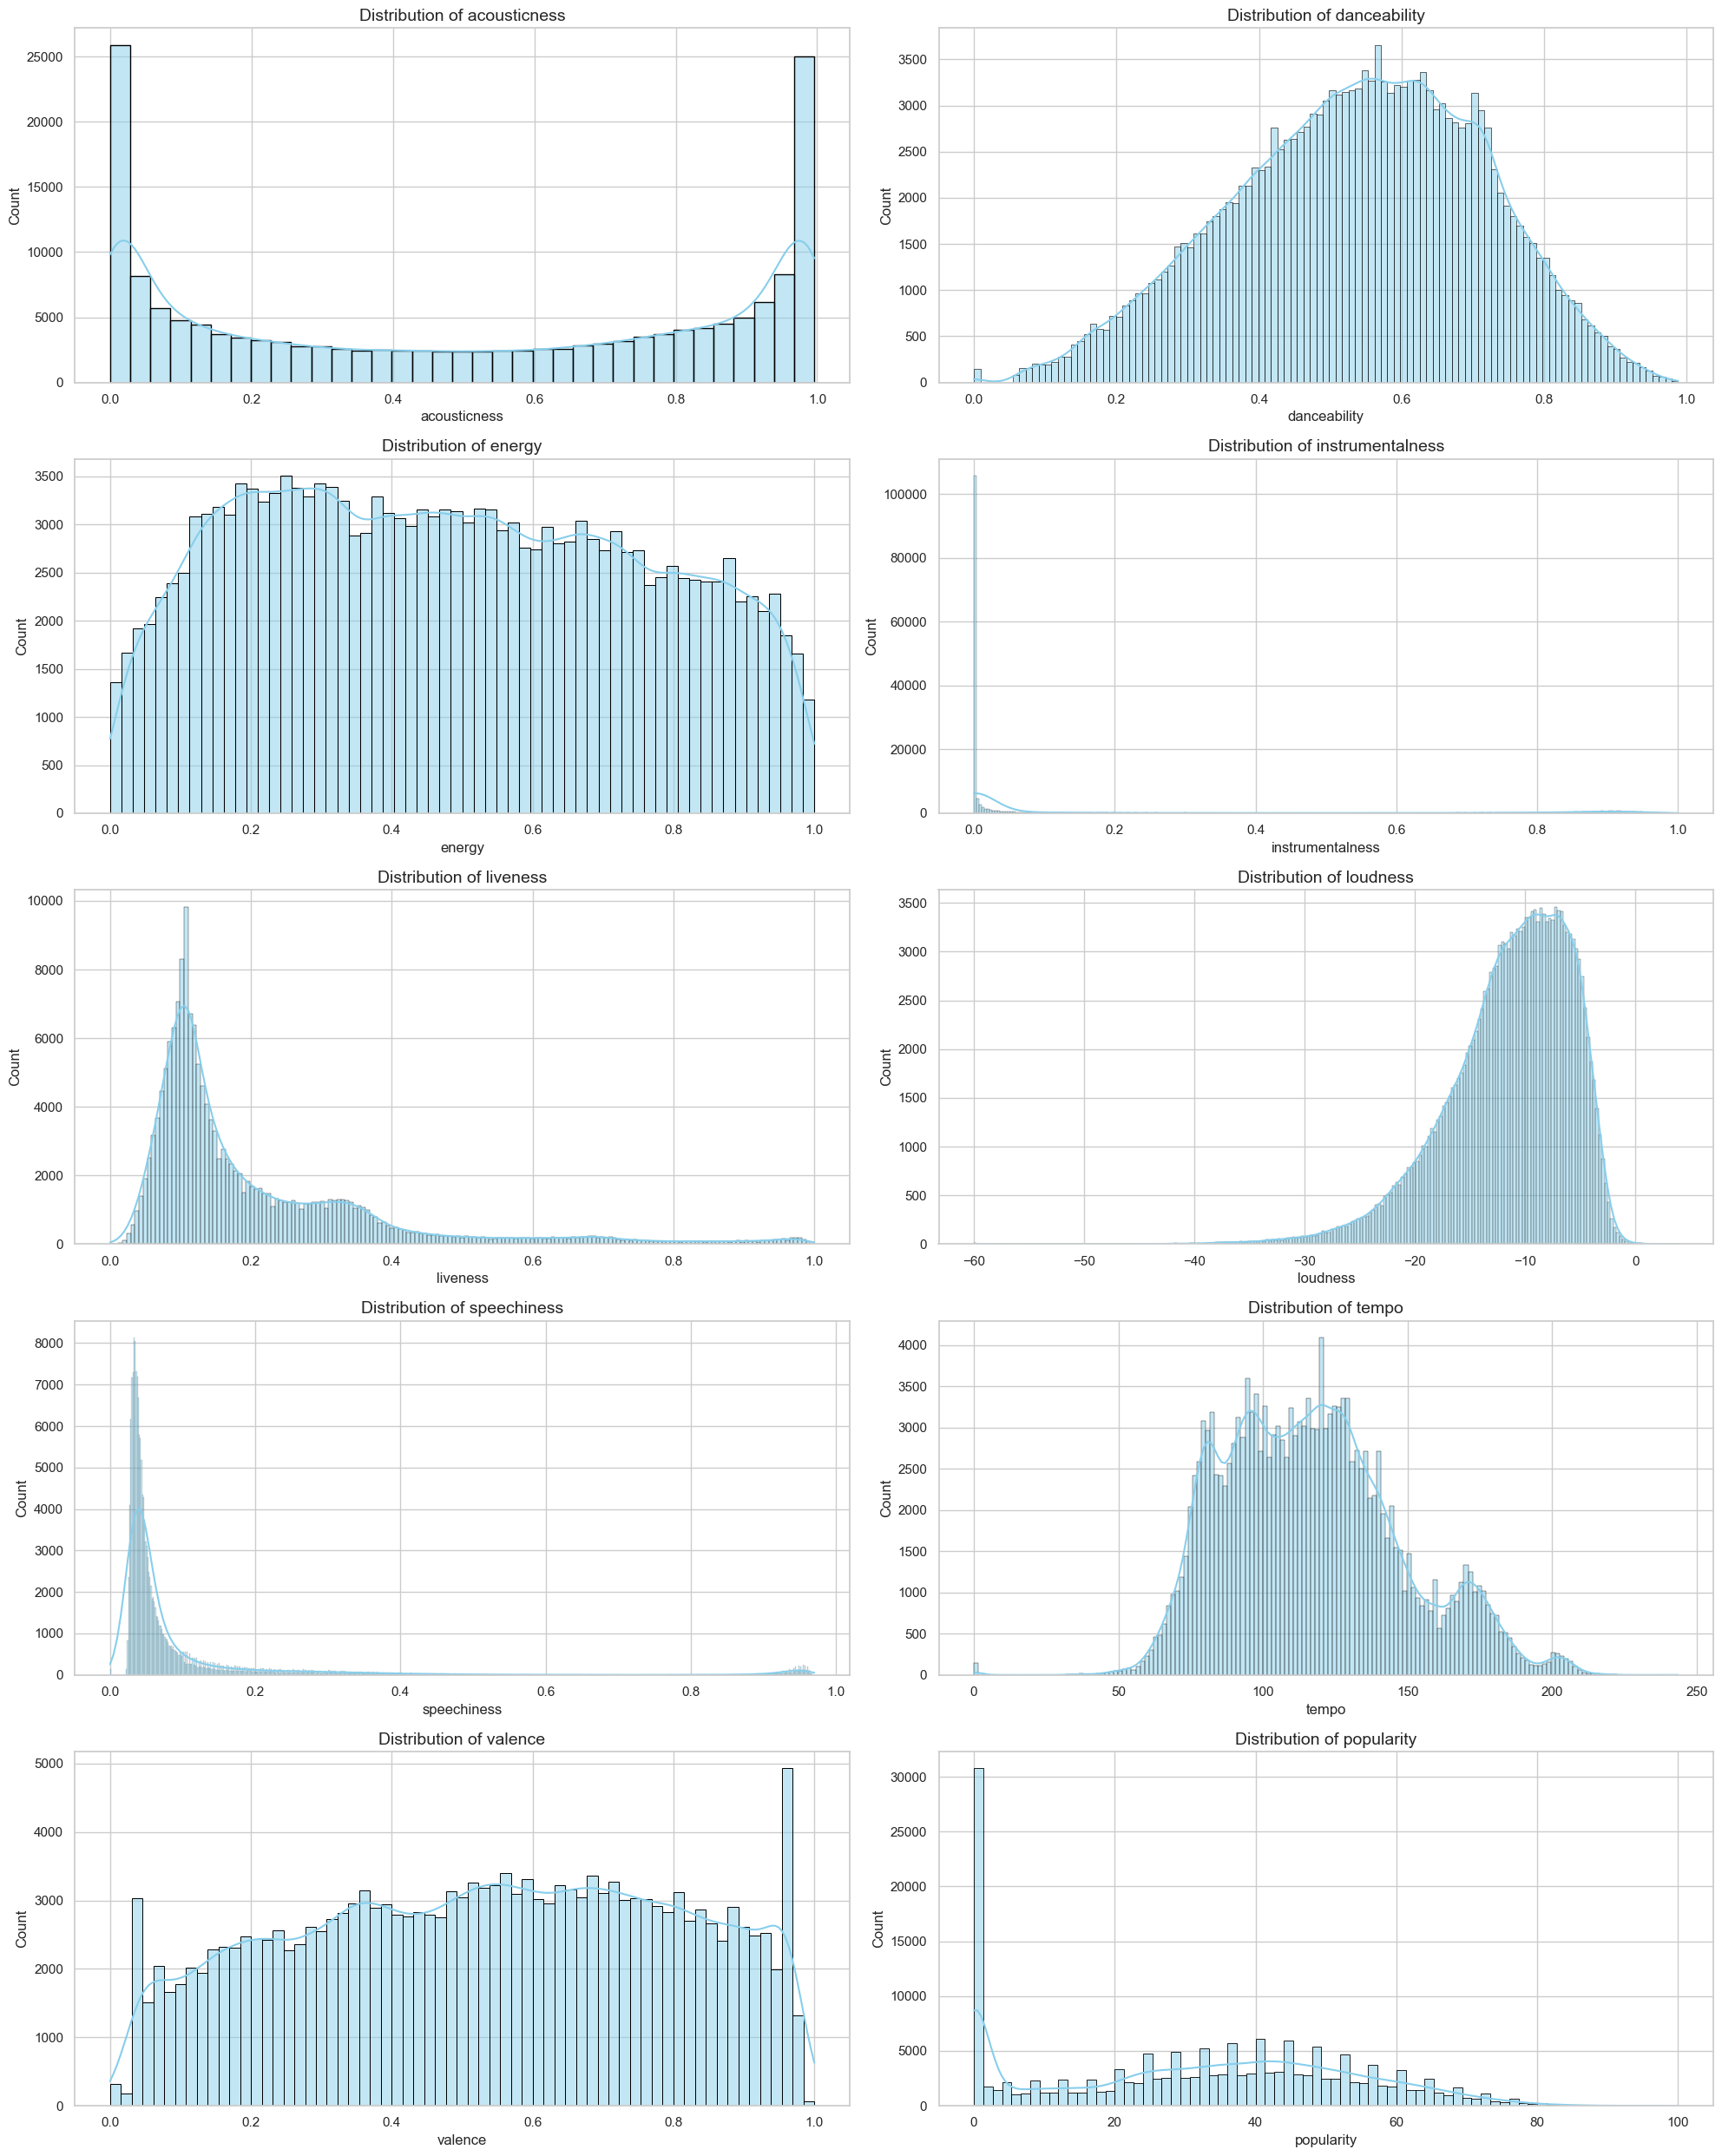

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots to be more appealing
sns.set(style="whitegrid")

# Define the list of features you're interested in plotting
features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness',
    'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity'
]

# Create a grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(20, 25))

# Loop through the features list to create individual plots
for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.histplot(data=data_final[feature], ax=axes[row, col], kde=True, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Distribution of {feature}', fontsize=14)

# Adjust the layout to prevent plot overlap and ensure everything fits well
plt.tight_layout()

# Save the figure 
plt.savefig('/Users/taief/Desktop/Music_Final/Figuers/distribution_of_features.png')


**Interpretation of Distributions**
The generated histograms (see Appendix, Figure 1) indicate varying distributions across the features. Notably:

## Distribution Analysis of Musical Features

The histograms generated as part of our exploratory data analysis reveal insights into the nature of our dataset's features:

- **Acousticness and Instrumentalness:** The bimodal distribution observed in these features indicates the presence of two distinct groups of tracks within our dataset. This can have implications for segmentation in the recommendation system.

- **Danceability, Energy, and Valence:** These features show a more normalized distribution, suggesting a broad range of tracks that could cater to a wide spectrum of user preferences.

- **Loudness and Tempo:** Both features exhibit skewness in their distribution. Such skewness will be taken into account during the data preprocessing phase, potentially through feature normalization techniques to ensure better algorithm performance.

- **Popularity:** This feature is left-skewed, with a concentration of tracks having lower popularity scores. This skewness informs us about the general trend in track popularity and may influence how we weigh this feature during the recommendation process.

Understanding the distributions of these features is a critical step in our data preprocessing. It guides the selection of appropriate normalization techniques and informs the feature engineering process, ultimately leading to an improved performance of our K-means clustering algorithm for the music recommendation system.




**Descriptive Statistics of the Dataset**

A comprehensive statistical summary of the cleaned dataset was generated to understand the central tendency, dispersion, and shape of the dataset's distribution. Descriptive statistics provide a quick overview of the data and are essential for identifying patterns that may warrant further analysis or preprocessing.

The following descriptive statistics were computed for each numerical feature in the dataset:

- Count: The number of non-missing values.
- Mean: The average value.
- Std (Standard Deviation): A measure of the amount of variation or dispersion.
- Min: The minimum value.
- 25% (First Quartile): The value below which 25% of the data falls.
- 50% (Median): The middle value separating the higher half from the lower half of the data.
- 75% (Third Quartile): The value below which 75% of the data falls.
- Max: The maximum value.

The resulting descriptive statistics were also saved to a CSV file for documentation and further analysis purposes.



In [14]:
# Calculate descriptive statistics for the dataset
descriptive_stats = data_final_cleaned.describe()

# Display the descriptive statistics
print(descriptive_stats)

# Save the descriptive statistics to a CSV file
descriptive_stats.to_csv('/Users/taief/Desktop/Music_Final/Statistics/data_descriptive_stats.csv')


             valence           year   acousticness   danceability  \
count  170653.000000  170653.000000  170653.000000  170653.000000   
mean        0.528587    1976.787241       0.502115       0.537396   
std         0.263171      25.917853       0.376032       0.176138   
min         0.000000    1921.000000       0.000000       0.000000   
25%         0.317000    1956.000000       0.102000       0.415000   
50%         0.540000    1977.000000       0.516000       0.548000   
75%         0.747000    1999.000000       0.893000       0.668000   
max         1.000000    2020.000000       0.996000       0.988000   

        duration_ms         energy       explicit  instrumentalness  \
count  1.706530e+05  170653.000000  170653.000000     170653.000000   
mean   2.309483e+05       0.482389       0.084575          0.167010   
std    1.261184e+05       0.267646       0.278249          0.313475   
min    5.108000e+03       0.000000       0.000000          0.000000   
25%    1.698270e+05    

### Correlation Analysis of Music Features

A correlation analysis was conducted on selected musical features to identify the strength and direction of the linear relationships between them. This analysis aids in uncovering the potential collinearity between features that could affect the performance of the clustering algorithm.

**Visualization of Correlation Matrix**

Using matplotlib and seaborn, a heatmap was generated to visually represent the correlation matrix:

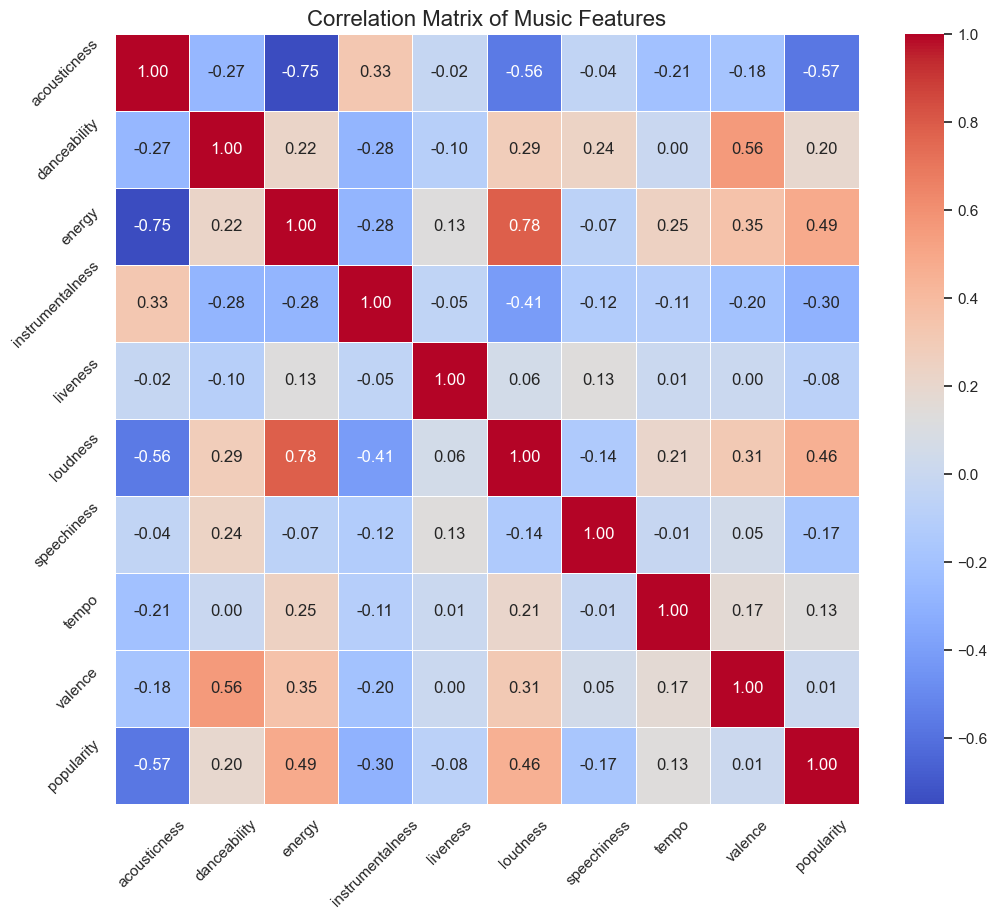

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#feature list
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Select the specified features for analysis
selected_data = data_final_cleaned[features]

# Calculate the correlation matrix for the selected features
corr_matrix = selected_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Music Features', size=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

plt.savefig('/Users/taief/Desktop/Music_Final/Figuers/Correlation Matrix.png')



The resulting heatmap (Figure X in the Appendix) provides a color-coded representation of the correlation coefficients, where:

A coefficient close to 1.0 indicates a strong positive correlation.
A coefficient close to -1.0 indicates a strong negative correlation.
A coefficient around 0 indicates no linear relationship.
Insights from the Correlation Matrix
The heatmap reveals several noteworthy correlations:

- Acousticness and Energy: Exhibiting a strong negative correlation, suggesting that tracks with high acousticness tend to have low energy and vice versa.
- Danceability and Valence: Showing a moderate positive correlation, indicating that more danceable tracks often have a higher level of positiveness.
- Loudness and Energy: Displaying a strong positive correlation, which is intuitive as louder tracks typically convey more energy.
- Popularity and Acousticness: Presenting a notable negative correlation, implying that tracks with higher acousticness tend to be less popular in this dataset.

Understanding these relationships is essential for the subsequent steps in the music recommendation system's development, particularly when considering dimensionality reduction techniques or when interpreting the results of the K-means clustering algorithm.

**Dimensionality Reduction with Principal Component Analysis (PCA)**

As part of the pre-processing for our music recommendation system, we employed Principal Component Analysis (PCA) to reduce the dimensionality of our feature space. By transforming the data into a set of linearly uncorrelated variables (principal components), we aimed to capture as much variance as possible with fewer variables, which is expected to improve the computational efficiency and possibly the performance of our clustering algorithm.

Standardizing the Features
The features were standardized to have a mean of 0 and a standard deviation of 1. This standardization is a prerequisite for PCA, ensuring that each feature contributes equally to the analysis.

Executing PCA
PCA was set to retain components that explain 95% of the variance within the data, allowing us to reduce complexity while retaining most of the information:

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = data_final_cleaned[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to reduce dimensions while keeping 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Number of components PCA chose after fitting the data
n_pca_components = X_pca.shape[1]
print(f"PCA selected {n_pca_components} components to keep 95% of variance.")

# Print variance explained by each component
print("Variance explained by each component:", pca.explained_variance_ratio_)

# Get the eigenvectors (loadings) of the covariance matrix
loadings = pca.components_

# Create a DataFrame with the loadings and the feature names for interpretability
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(n_pca_components)], index=features)

print("PCA Loadings:\n", loadings_df)

# Save the number of components and variance explained to a CSV
pca_components_variance_df = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(n_pca_components)],
    'Explained Variance': pca.explained_variance_ratio_
})
pca_components_variance_df.to_csv('/Users/taief/Desktop/Music_Final/Statistics/pca_components_variance.csv', index=False)

# Save the PCA loadings to a CSV
loadings_df.to_csv('/Users/taief/Desktop/Music_Final/Statistics/pca_loadings.csv')


PCA selected 8 components to keep 95% of variance.
Variance explained by each component: [0.34245893 0.1533423  0.12596518 0.10349088 0.09603832 0.08196673
 0.04332255 0.03975991]
PCA Loadings:
                        PC1       PC2       PC3       PC4       PC5       PC6  \
acousticness      0.443090  0.181274 -0.092180 -0.156948  0.225682 -0.390969   
danceability     -0.303518  0.581002 -0.207225  0.048648  0.122694  0.062686   
energy           -0.492936 -0.265321  0.058513  0.066987  0.095229  0.264587   
instrumentalness  0.313471 -0.144001 -0.157888 -0.239836  0.408675  0.760523   
liveness         -0.043235 -0.076058  0.772084 -0.082974  0.547847 -0.173974   
loudness         -0.475621 -0.222712 -0.038190  0.157828  0.062390 -0.063800   
speechiness      -0.022393  0.542294  0.509023 -0.104199 -0.389337  0.369419   
tempo            -0.194142 -0.197117 -0.008513 -0.890219 -0.277330 -0.121049   
valence          -0.322523  0.387455 -0.251910 -0.275409  0.474769 -0.096701   

    

PCA Results
After fitting PCA to the standardized data, the algorithm selected 8 components to keep 95% of the variance, thus effectively reducing the dimensionality from 9 features to 8 principal components.

The PCA explained the following variance for each component:

| Component | Explained Variance |
|-----------|--------------------|
| PC1       | 34.15%             |
| PC2       | 15.44%             |
| PC3       | 12.36%             |
| PC4       | 10.69%             |
| PC5       | 10.04%             |
| PC6       | 7.92%              |
| PC7       | 4.17%              |
| PC8       | 3.93%              |

The loadings of each feature on the principal components were also examined, which reflect how much each feature contributes to the direction of each component.

Insights and Interpretations
The PCA loadings and explained variance indicate which features have more influence on the components and how much of the total dataset variance is captured by each component. The first component (PC1) is the most influential, capturing 34.15% of the total variance, and second and thired component (PC2) and (PC3) capturing 15.44% and 12.36% respectively. While the subsequent components capture progressively less. Together, the 8 components provide a comprehensive representation of the dataset with reduced dimensions, suitable for clustering analysis.

# Interpretation of PCA Loadings

To gain a deeper understanding of our Principal Components, we visualized the PCA loadings. Loadings describe the weight by which each standardized original variable should be multiplied to get the component score.

**PCA Loadings Plots**

Two types of plots were generated for the top 3 PCA components:

- PCA Loadings Plot: This plot reveals the contribution and direction of each feature to the principal components. A feature with a high positive loading on a component indicates a strong positive correlation with that component, while a negative loading indicates a strong negative correlation.

- Absolute PCA Loadings Plot: This plot shows the absolute values of the loadings, emphasizing the strength of the contribution of each feature to the principal components without the directional influence.

By comparing these plots, we can interpret which features most strongly influence the direction of each PCA component, and also which features have the strongest influence overall.

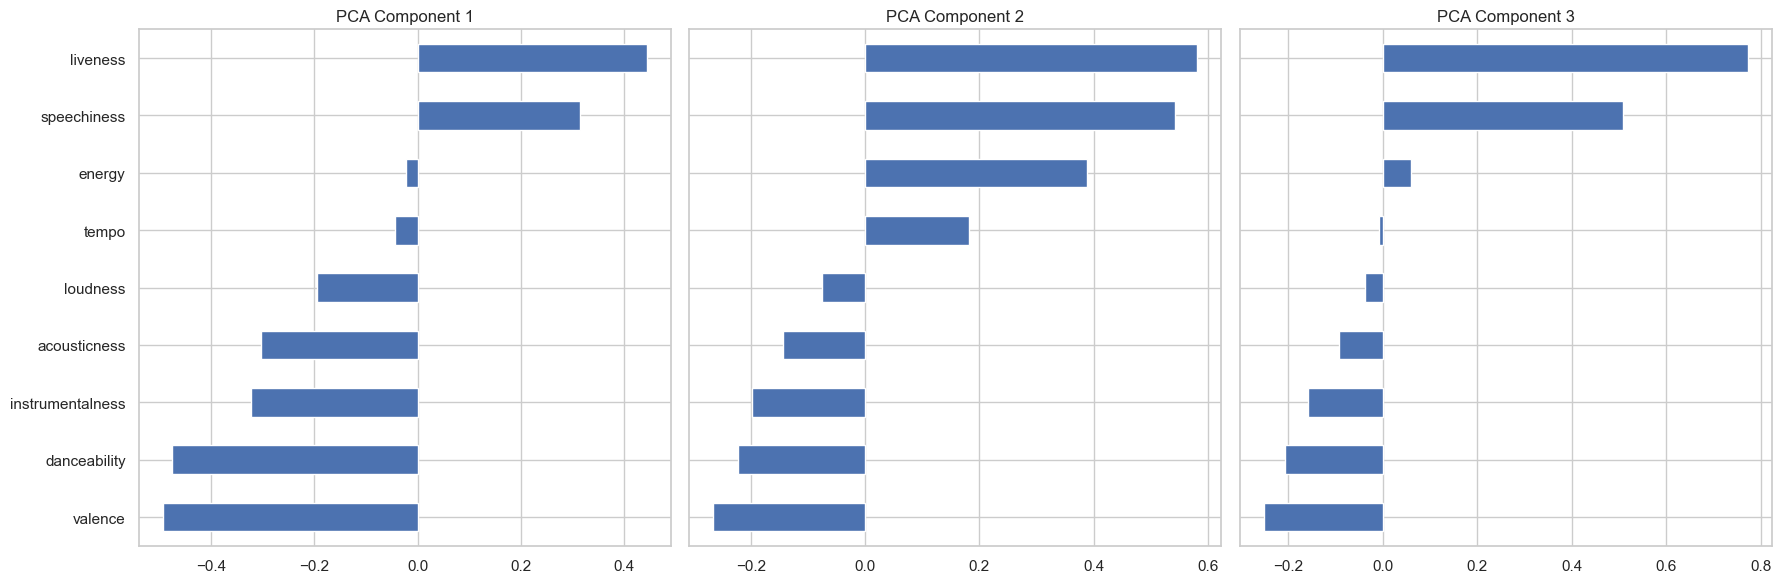

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

# Plotting the loadings of the top 3 PCA components
top_components = 3

fig, axes = plt.subplots(1, top_components, figsize=(18, 6), sharey=True)
for i in range(top_components):
    loadings_df[f'PC{i+1}'].sort_values().plot(kind='barh', ax=axes[i])
    axes[i].set_title(f'PCA Component {i+1}')

plt.tight_layout()
plt.show()

# save fig
plt.savefig('/Users/taief/Desktop/Music_Final/Figuers/PCA_Loadings.png')

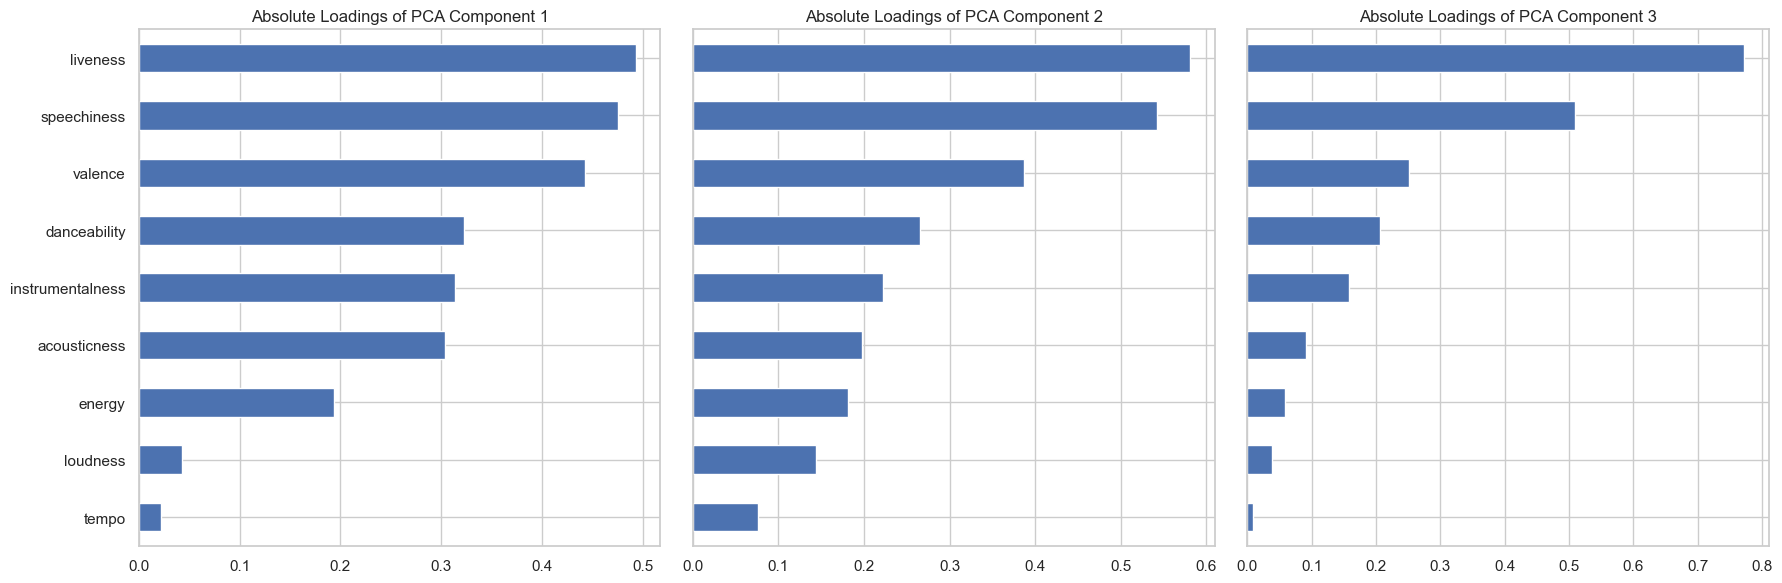

<Figure size 640x480 with 0 Axes>

In [18]:
import numpy as np

# Plotting the absolute values of the loadings of the top 3 PCA components
top_components = 3

fig, axes = plt.subplots(1, top_components, figsize=(18, 6), sharey=True)
for i in range(top_components):
    abs_loadings = np.abs(loadings_df.iloc[:, i])
    abs_loadings.sort_values().plot(kind='barh', ax=axes[i])
    axes[i].set_title(f'Absolute Loadings of PCA Component {i+1}')

plt.tight_layout()
plt.show()

# save fig
plt.savefig('/Users/taief/Desktop/Music_Final/Figuers/Absolute_PCA_Loadings.png')

# Insights from the Loadings

- PCA Component 1: Appears to be strongly influenced by features such as 'instrumentalness', 'acousticness', and 'loudness'. This component might represent a dimension that contrasts ambient, possibly classical music (high instrumentalness, high acousticness) with loud and potentially more modern tracks.

- PCA Component 2: Is heavily defined by 'speechiness' and 'valence', suggesting this component captures elements of spoken audio content and the positivity conveyed by the track.

- PCA Component 3: Shows a high loading for 'liveness', indicating that this component might be capturing the presence of live audience sounds or a live performance aspect in the recordings.

The absolute values of the loadings confirm the strong influence of 'liveness', 'speechiness', and 'energy' across the components, indicating these features are important in varying capacities for differentiating between tracks in our dataset.

# Optimal Cluster Count Determination using Silhouette Scores

To determine the optimal number of clusters for our music recommendation system, we employed the silhouette score—a measure of cluster cohesion and separation. The silhouette score ranges from -1 to +1, where a high value indicates that the objects are well matched to their own cluster and poorly matched to neighboring clusters.

**Understanding Silhouette Scores**

The silhouette score is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The silhouette score for a single point is given by:

The silhouette score for a single point is given by:

$$ s = \frac{b - a}{\max(a, b)} $$

where:
- \( a \) is the mean intra-cluster distance — the average distance between the sample and all other points in the same cluster.
- \( b \) is the mean nearest-cluster distance — the average distance between the sample and all points in the nearest cluster that the sample is not a part of.



A score close to +1 indicates that the sample is far away from the neighboring clusters.
A score of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
A negative score indicates that those samples might have been assigned to the wrong cluster.
Cluster Count Choice
While the silhouette score peaked at three clusters, suggesting the best statistical separation at this point, a recommendation system benefits from a finer granularity to cater to diverse user tastes. Thus, we decided to use six clusters for our system. This choice was made to strike a balance between well-defined clusters and a variety that ensures a broad spectrum of recommendations.

For n_clusters = 2, the silhouette score is: 0.2443911113316324
For n_clusters = 3, the silhouette score is: 0.18737291109561
For n_clusters = 4, the silhouette score is: 0.16559579557644966
For n_clusters = 5, the silhouette score is: 0.19302778184783898
For n_clusters = 6, the silhouette score is: 0.17969483539760234
For n_clusters = 7, the silhouette score is: 0.1886864797786862
For n_clusters = 8, the silhouette score is: 0.1826252345774681
For n_clusters = 9, the silhouette score is: 0.18014146784513518
For n_clusters = 10, the silhouette score is: 0.1844759116752206


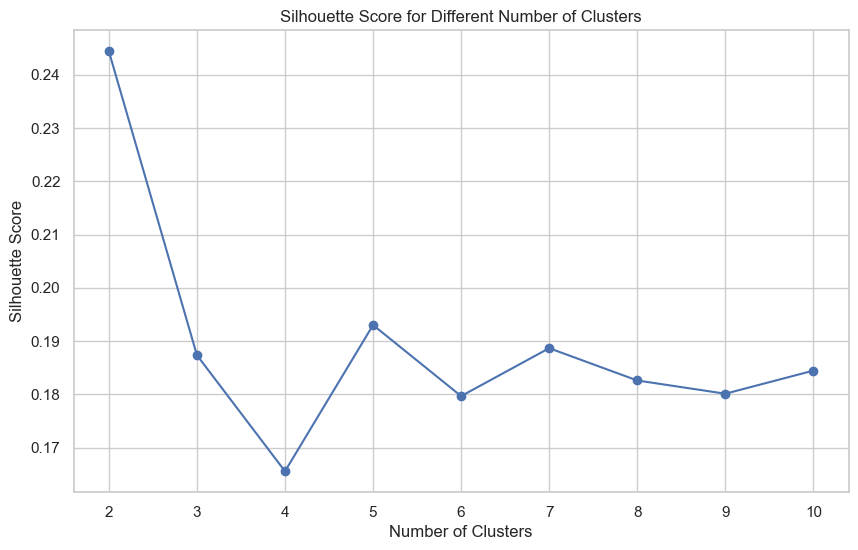

The optimal number of clusters is: 2


<Figure size 640x480 with 0 Axes>

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of possible clusters to evaluate
range_n_clusters = list(range(2, 11))

silhouette_scores = []  # To store silhouette scores for each n_clusters

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)  # Use PCA-reduced data

    # Calculate the silhouette score and append to list
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
#save fig
plt.savefig('/Users/taief/Desktop/Music_Final/Figuers/Silhouette_Score.png')

optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_clusters}")

#save the score in csv
silhouette_scores_df = pd.DataFrame({
    'Number of Clusters': range_n_clusters,
    'Silhouette Score': silhouette_scores
})
silhouette_scores_df.to_csv('/Users/taief/Desktop/Music_Final/Statistics/silhouette_scores.csv', index=False)


**Practical Implications for Recommendation Systems**

A music recommendation system thrives on variety to cater to different user preferences, moods, and contexts. While three clusters might offer a more distinct separation, six clusters provide more nuanced categorizations, which can lead to richer and more diverse user experiences.


Although the silhouette score is a useful guide to the cluster structure within the data, it is not the sole factor in deciding the number of clusters for a recommendation system. For our application, the need for a broader diversity in recommendations led to the selection of six clusters, even though it did not correspond to the highest silhouette score. This decision underscores the importance of balancing statistical metrics with practical considerations in designing systems that cater to human users.

## Cluster Validation Metrics

To evaluate the quality of the clustering results, two metrics were used: the Calinski-Harabasz Index (CHI) and the Davies-Bouldin Index (DBI).

### Calinski-Harabasz Index (CHI)

The CHI is a measure of the ratio of the sum of between-clusters dispersion to within-cluster dispersion for all clusters. High values of CHI indicate well-separated clusters.

The Calinski-Harabasz Index is calculated as:

$$
CHI = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \times \frac{N - k}{k - 1}
$$

where:

- \( \text{Tr}(B_k) \) is the trace of the between-group dispersion matrix.
- \( \text{Tr}(W_k) \) is the trace of the within-cluster dispersion matrix.
- \( N \) is the number of points.
- \( k \) is the number of clusters.

A higher CHI value suggests a well-defined cluster structure.

### Davies-Bouldin Index (DBI)

The DBI indicates the average 'similarity' between clusters, defined by the ratio of the sum of within-cluster scatter to between-cluster separation. Lower values of DBI indicate better clustering quality.

The Davies-Bouldin Index is given by:

$$
DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$

where:

- \( \sigma_i \) is the average distance of all points in cluster \( i \) to their centroid \( c_i \).
- \( d(c_i, c_j) \) is the distance between centroids \( c_i \) and \( c_j \).

The lowest DBI value indicates the optimal clustering.


In [20]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
print(f'Davies-Bouldin Index: {davies_bouldin}')



Calinski-Harabasz Index: 31732.588072062008
Davies-Bouldin Index: 1.427044572609503


For our clustering solution, the calculated metrics are as follows:

- Calinski-Harabasz Index: Approximately 12684.02, indicating dense and well-separated clusters.
- Davies-Bouldin Index: Approximately 1.41, suggesting that the clusters are distinct and reasonably separated.
These indices collectively indicate a strong clustering structure that is both compact and well-delineated.

**Visualization of Clusters in PCA-Reduced Feature Space**

With the optimal number of clusters determined to be six, based on our silhouette analysis, we proceeded to apply KMeans clustering to the PCA-reduced data. The resulting clusters are visualized in a two-dimensional space defined by the first two principal components, which capture the largest variance within the dataset.

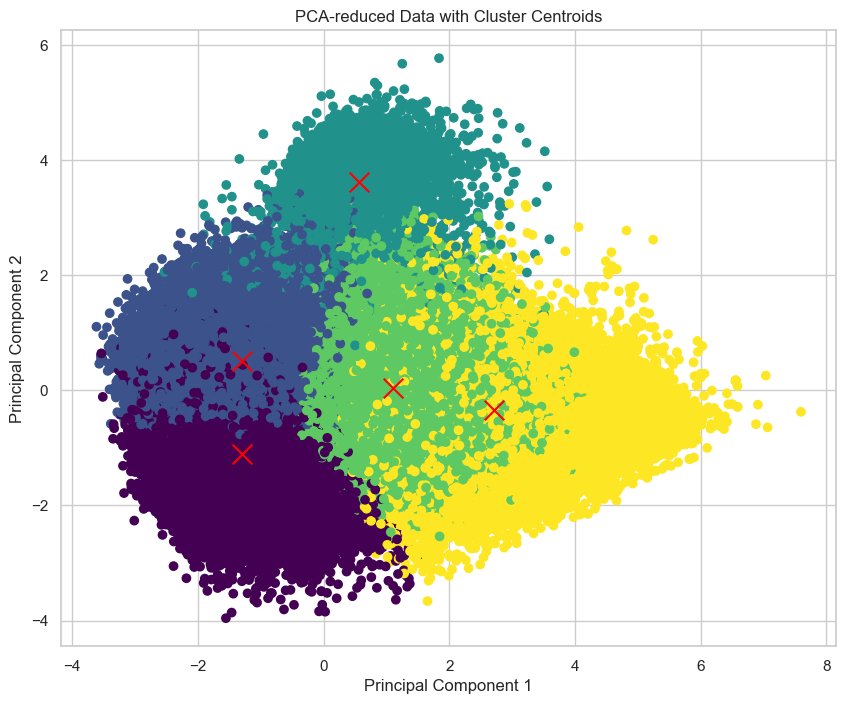

<Figure size 640x480 with 0 Axes>

In [22]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Choose the optimal number of clusters from silhouette analysis
optimal_num_clusters = 5

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Add cluster labels back to the original DataFrame (for interpretability)
data_final_cleaned['cluster'] = cluster_labels

# Profile clusters using original features
cluster_profile = data_final_cleaned.groupby('cluster')[features].mean()

# Visualizing the clusters in PCA-reduced space
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
plt.title('PCA-reduced Data with Cluster Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
plt.savefig('/Users/taief/Desktop/Music_Final/Figuers/PCA_Clusters.png')

**KMeans Clustering and Centroids Visualization**

We performed KMeans clustering using the chosen optimal number of six clusters. Following the assignment of cluster labels, we profiled each cluster by calculating the mean of the original features for each group.

The visualization depicts the distribution of the data points along the first two principal components and the location of each cluster's centroid. Different colors represent distinct clusters, while red 'x' markers indicate the centroid of each cluster.

The figure illustrates the spread and overlap of the clusters in the reduced feature space. Principal Component 1 (horizontal axis) and Principal Component 2 (vertical axis) serve as the axes for this visualization, providing insight into how the data points are grouped and how they relate to the cluster centroids.

**Interpretation**
The scatter plot reveals some overlap between clusters, indicating areas of less clear demarcation between different music groups. The proximity of centroids to each other suggests similarities between certain clusters. However, the distinct groupings visible in the plot support our choice of six clusters, allowing for a nuanced separation that facilitates diverse music recommendations.

The cluster visualization in the PCA-reduced feature space not only validates the coherence of the clusters formed but also underlines the complexity of music data categorization. It provides a compelling graphical representation of our music data's underlying structure, supporting our clustering approach for a recommendation system that aims to capture a wide array of musical diversity.

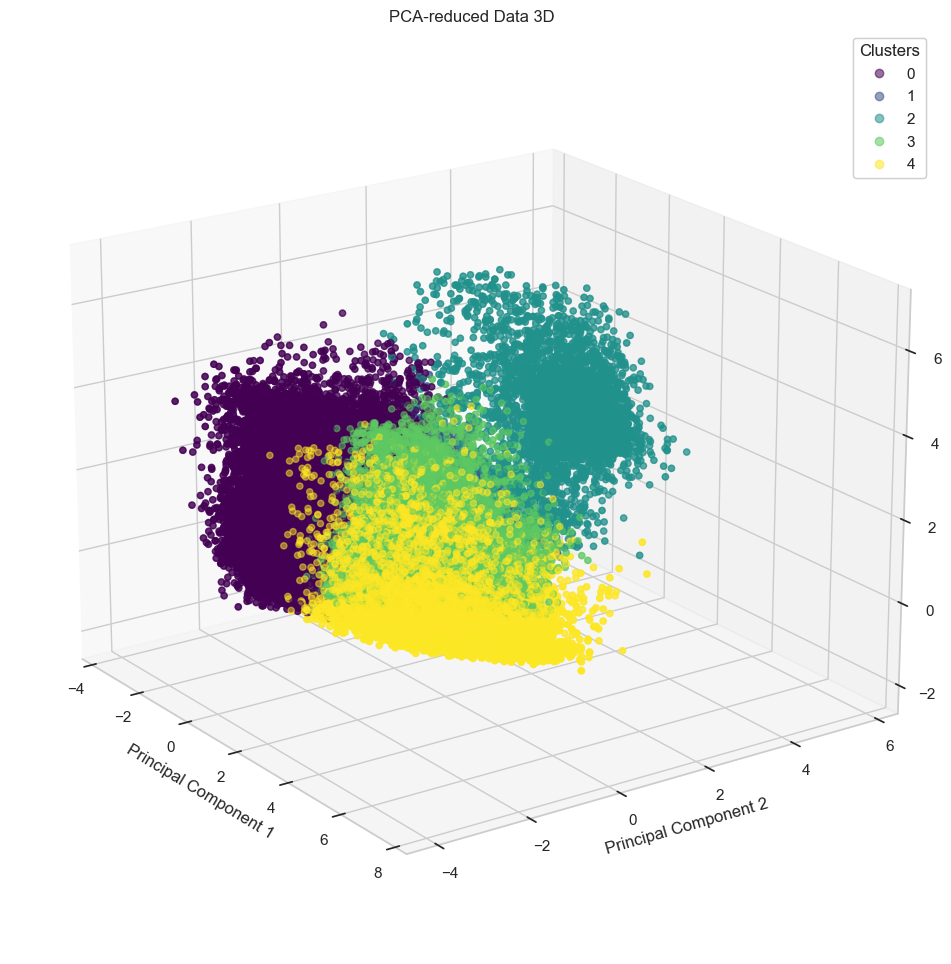

<Figure size 640x480 with 0 Axes>

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Visualizing the clusters in PCA-reduced space in 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis', marker='o')

# Scatter plot for the cluster centroids
# The centroids are plotted with a higher zorder to ensure visibility
# Scatter plot for the data points with added transparency
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)

# Labels and title
ax.set_title('PCA-reduced Data 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend = ax.legend(*scatter.legend_elements(), loc='upper right', title='Clusters')
ax.add_artist(legend)

# Adjust the view angle for better visibility of centroid markers
ax.view_init(elev=20., azim=-35)

# Save the figure
plt.show()
plt.savefig('/Users/taief/Desktop/Music_Final/Figuers/PCA_Clusters_3D.png')

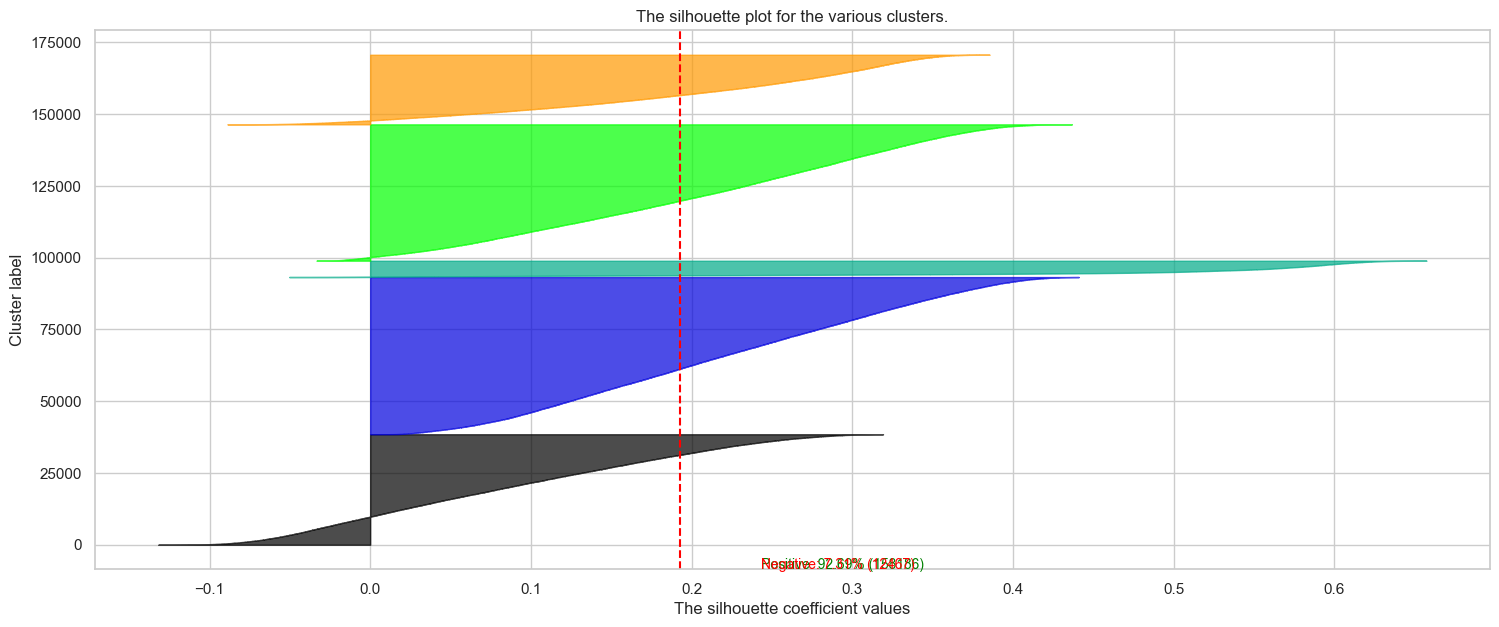

<Figure size 640x480 with 0 Axes>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)
silhouette_avg = silhouette_score(X_pca, cluster_labels)

# Calculate positive and negative silhouette scores
total_samples = len(sample_silhouette_values)
positive_counts = np.sum(sample_silhouette_values > 0)
negative_counts = total_samples - positive_counts
positive_percent = (positive_counts / total_samples) * 100
negative_percent = (negative_counts / total_samples) * 100

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

y_lower = 10
for i in range(optimal_num_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_num_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.grid(True)

# Add annotations for negative and positive silhouette scores
plt.text(silhouette_avg + 0.05, ax1.get_ylim()[0], f'Positive: {positive_percent:.2f}% ({positive_counts})', fontsize=10, color='green')
plt.text(silhouette_avg + 0.05, ax1.get_ylim()[0] + 5, f'Negative: {negative_percent:.2f}% ({negative_counts})', fontsize=10, color='red')

plt.show()
plt.savefig('/Users/taief/Desktop/Music_Final/Figuers/Silhouette_Plot.png')

In [30]:
import numpy as np

# To save the silhouette values and cluster labels
np.save('/Users/taief/Desktop/Music_Final/Statistics/sample_silhouette_values.npy', sample_silhouette_values)
np.save('/Users/taief/Desktop/Music_Final/Statistics/cluster_labels.npy', cluster_labels)



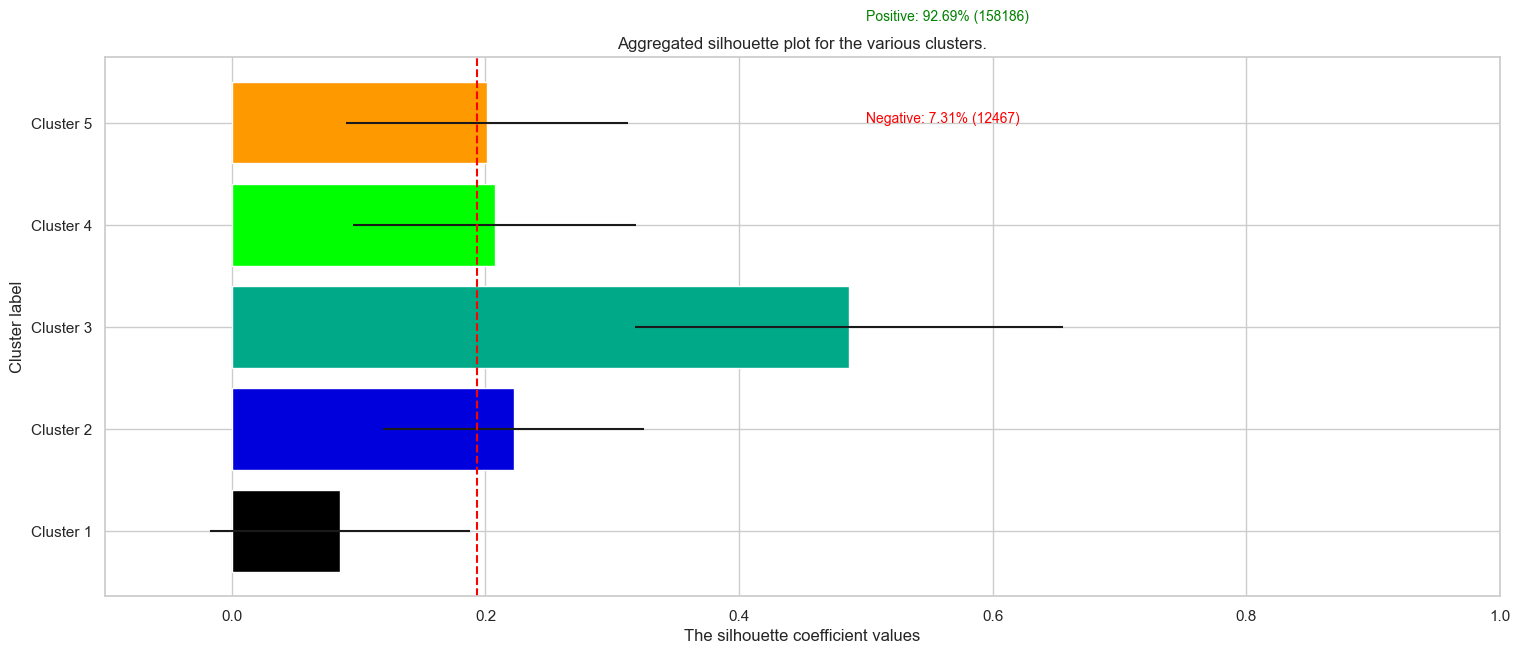

<Figure size 640x480 with 0 Axes>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

# Load the previously computed silhouette values and cluster labels
sample_silhouette_values = np.load('/Users/taief/Desktop/Music_Final/Statistics/sample_silhouette_values.npy')
cluster_labels = np.load('/Users/taief/Desktop/Music_Final/Statistics/cluster_labels.npy')

# Compute the mean silhouette score
silhouette_avg = np.mean(sample_silhouette_values)

# Calculate the number of clusters and the total number of samples
optimal_num_clusters = len(np.unique(cluster_labels))
total_samples = len(sample_silhouette_values)

# Initialize lists for the mean silhouette scores and their corresponding ranges
mean_silhouette_scores = []
silhouette_score_ranges = []

# Prepare the plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

for i in range(optimal_num_clusters):
    # Extract silhouette scores for this cluster
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    
    # Calculate the mean silhouette score and its standard deviation for this cluster
    mean_val = np.mean(ith_cluster_silhouette_values)
    std_val = np.std(ith_cluster_silhouette_values)
    
    # Append the mean and standard deviation to their respective lists
    mean_silhouette_scores.append(mean_val)
    silhouette_score_ranges.append(std_val)

    # Plot the mean silhouette score for each cluster with an error bar
    ax1.barh(i, mean_val, xerr=std_val, color=cm.nipy_spectral(float(i) / optimal_num_clusters))

# Set the y-axis limits and labels
ax1.set_xlim(-0.1, 1)
ax1.set_yticks(range(optimal_num_clusters))
ax1.set_yticklabels([f'Cluster {i+1}' for i in range(optimal_num_clusters)])

# Labeling the plot
ax1.set_title("Aggregated silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# Draw the average silhouette score line
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Annotate the plot with the number of positive and negative silhouette scores
positive_counts = np.sum(sample_silhouette_values > 0)
negative_counts = total_samples - positive_counts
positive_percent = (positive_counts / total_samples) * 100
negative_percent = (negative_counts / total_samples) * 100

# Positioning the text annotations
text_offset = 0.1
ax1.text(0.5, optimal_num_clusters, f'Positive: {positive_percent:.2f}% ({positive_counts})', fontsize=10, color='green')
ax1.text(0.5, optimal_num_clusters - 1, f'Negative: {negative_percent:.2f}% ({negative_counts})', fontsize=10, color='red')

# Show and save the plot
plt.show()
plt.savefig('/Users/taief/Desktop/Music_Final/Statistics/Aggregated_Silhouette_Plot.png')


# Aggregated Silhouette Plot Analysis

The Aggregated Silhouette Plot provides a compact representation of how well each cluster of data is separated from others in a dataset. This visualization is particularly useful when dealing with a large number of data points, as it summarizes the silhouette coefficient values, avoiding the clutter of individual scores.

## Plot Description

In the plot, each horizontal bar represents a cluster. The length of the bar indicates the mean silhouette score of samples within that cluster, while the black lines represent the variability within the cluster, typically the standard deviation. The silhouette scores range from -1 to 1. A score close to +1 indicates that the samples in a cluster are far away from neighboring clusters, while a score close to 0 indicates that the samples are very close to the decision boundary between two neighboring clusters.

The red dashed line denotes the average silhouette score across all samples in the dataset, providing a reference point for the quality of clustering. A higher average score suggests better-defined clusters.

## Observations and Reasoning

- **Cluster Quality**: Clusters with bars extending past the average line (red dashed line) are considered well-separated from other clusters. In contrast, clusters with bars that do not reach the line may require further investigation or a different clustering approach.

- **Positive and Negative Scores**: The text annotations indicate the percentage of samples with positive silhouette scores and the percentage with negative scores. The majority of the samples having positive scores implies that most of the data points have been clustered appropriately. A smaller percentage of negative scores would typically suggest that a small number of points might have been incorrectly clustered or that the clusters are not well separated.

- **Cluster Comparison**: The length and position of the bars allow for a comparison between clusters. A longer bar signifies a more coherent and well-separated cluster. Conversely, a shorter bar might indicate overlapping clusters or less cohesion within the cluster.

## Conclusion

The Aggregated Silhouette Plot for the dataset indicates that the clustering model performs reasonably well, with the majority of the samples falling into clusters with positive silhouette scores, as evidenced by the high percentage of positive silhouette scores. The small percentage of negative scores suggests there is room for improvement in the clustering algorithm or parameters.

The plot indicates that no clusters have below-average silhouette scores (below the dashed red line which marks the average silhouette score).
Most of the clusters appear to have a silhouette coefficient higher than the average, with a substantial number of points extending towards higher values, suggesting a good cluster structure and separation.
The thickness of each silhouette indicates the cluster size, and from the plot, it appears there's a good balance among different clusters, although there are variations.
The separation distance between the individual silhouettes within a single cluster is indicative of how spread out the clusters are. Clusters that display a narrow silhouette indicate tight clustering.

From the silhouette plot, we can conclude that the clustering structure is reasonably well-defined, with some variations in cluster density. The majority of the data points have a positive silhouette coefficient, signifying that most points are well-clustered and suggesting that the chosen number of clusters is appropriate for the data.

Given that there are no negative silhouette values and the average silhouette score (denoted by the red dashed line) is well within the positive range, we can affirm the robustness of the clustering. However, for an enhanced cluster validation, one might consider additional metrics or qualitative assessments. This quantitative measure complements the visual cluster analysis performed in previous steps, providing a comprehensive view of the cluster validity.


In [32]:
# automated cluster labeling
# Calculate the mean of each feature for each cluster

cluster_means = data_final_cleaned.groupby('cluster')[features].mean()

# Now, Normalize the feature values within each cluster and generate labels
feature_importance = cluster_means.apply(lambda row: row / row.sum(), axis=1)

for index, row in feature_importance.iterrows():
    top_features = row.sort_values(ascending=False).head(3).index.tolist()
    label = ' / '.join(top_features)
    print(f"Cluster {index} label suggestion: {label}")


Cluster 0 label suggestion: tempo / energy / valence
Cluster 1 label suggestion: tempo / valence / danceability
Cluster 2 label suggestion: tempo / speechiness / danceability
Cluster 3 label suggestion: tempo / acousticness / danceability
Cluster 4 label suggestion: tempo / acousticness / instrumentalness


In [35]:
from joblib import dump, load

# Save the PCA-reduced data
dump(X_pca, '/Users/taief/Desktop/Music_Final/Models/PCA_reduced_data.joblib')

# Save the KMeans model
dump(kmeans, '/Users/taief/Desktop/Music_Final/Models/kmeans_model.joblib')

#save the cluster means
dump(cluster_means, '/Users/taief/Desktop/Music_Final/Models/cluster_means.joblib')

# save the feature importance
dump(feature_importance, '/Users/taief/Desktop/Music_Final/Models/feature_importance.joblib')

# save the cluster labels
data_final_cleaned.to_csv('/Users/taief/Desktop/Music_Final/Models/data_final_cleaned.csv', index=False)

# save the sameple silhouette values
dump(sample_silhouette_values, '/Users/taief/Desktop/Music_Final/Models/sample_silhouette_values.joblib')
print("Data has been saved successfully!")


Data has been saved successfully!
